In [3]:
from IPython.display import clear_output
! pip install alphagenome python-dotenv
clear_output()

In [4]:
import sys
from pathlib import Path

# Allow importing utils from project subdir.
sys.path.append(str(Path('..').resolve()))

from utils import (
    get_dna_model,
    get_output_metadata,
    load_gtf_feather,
    prepare_gtf_views,
    build_transcript_extractors,
)

DATA_DIR=Path('../data')

dna_model = get_dna_model()
output_metadata = get_output_metadata(dna_model)

gtf = load_gtf_feather(data_dir=DATA_DIR)
gtf_transcript, gtf_longest_transcript = prepare_gtf_views(gtf)
transcript_extractor, longest_transcript_extractor = (
    build_transcript_extractors(gtf_transcript, gtf_longest_transcript)
)


gencode.v46.annotation.gtf.gz.feather already exists!


In [41]:
from IPython.display import display
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

print(gtf.columns)
display(gtf[:5])


Index(['Chromosome', 'Source', 'Feature', 'Start', 'End', 'Score', 'Strand',
       'Frame', 'gene_id', 'gene_type', 'gene_name', 'level', 'tag',
       'transcript_id', 'transcript_type', 'transcript_name',
       'transcript_support_level', 'havana_transcript', 'exon_number',
       'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid',
       'artif_dupl', 'gene_id_nopatch'],
      dtype='object')


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,gene_name,level,tag,transcript_id,transcript_type,transcript_name,transcript_support_level,havana_transcript,exon_number,exon_id,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl,gene_id_nopatch
0,chr1,HAVANA,gene,11868,14409,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,overlaps_pseudogene,None,None,None,None,None,None,None,None,None,None,None,None,None,ENSG00000290825
1,chr1,HAVANA,transcript,11868,14409,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,"basic,Ensembl_canonical",ENST00000456328.2,lncRNA,DDX11L2-202,1,OTTHUMT00000362751.1,None,None,None,None,None,None,None,None,ENSG00000290825
2,chr1,HAVANA,exon,11868,12227,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,"basic,Ensembl_canonical",ENST00000456328.2,lncRNA,DDX11L2-202,1,OTTHUMT00000362751.1,1,ENSE00002234944.1,None,None,None,None,None,None,ENSG00000290825
3,chr1,HAVANA,exon,12612,12721,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,"basic,Ensembl_canonical",ENST00000456328.2,lncRNA,DDX11L2-202,1,OTTHUMT00000362751.1,2,ENSE00003582793.1,None,None,None,None,None,None,ENSG00000290825
4,chr1,HAVANA,exon,13220,14409,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,"basic,Ensembl_canonical",ENST00000456328.2,lncRNA,DDX11L2-202,1,OTTHUMT00000362751.1,3,ENSE00002312635.1,None,None,None,None,None,None,ENSG00000290825


In [59]:
from alphagenome.data import gene_annotation, genome
GENE_NAME= 'HBB' # HBB, GAPDH, etc.
# gene_gtf = gtf[(gtf['gene_name'] == GENE_NAME) & (gtf['Feature'] == 'gene')].iloc[0]
gene_gtf = gtf[(gtf['gene_name'] == GENE_NAME) & (gtf['Feature']=='transcript')].iloc[0]
gene_gtf[:]

Chromosome                                                                                                           chr11
Source                                                                                                              HAVANA
Feature                                                                                                         transcript
Start                                                                                                              5225463
End                                                                                                                5227071
Score                                                                                                                    .
Strand                                                                                                                   -
Frame                                                                                                                    .
gene_id         

In [60]:
# gene_gtf = gtf[(gtf['gene_name'] == GENE_NAME) & (gtf['Feature'] == 'gene')].iloc[0]


gene_id = gene_gtf['gene_id']
chrom = gene_gtf['Chromosome']
start = int(gene_gtf['Start'])
end = int(gene_gtf['End'])
strand = gene_gtf['Strand']

print(f"{GENE_NAME} Gene({gene_id}): {chrom}:{start}-{end} ({strand})")


HBB Gene(ENSG00000244734.4): chr11:5225463-5227071 (-)


In [ ]:
# gene_interval=gene_annotation.get_gene_interval(gtf, gene_symbol=GENE_NAME)
gene_interval=genome.Interval(chrom, start, end, strand, name=GENE_NAME)
# gene_interval.resize_inplace(gene_interval.width+2000)
gene_interval

vis_interval=genome.Interval(chrom, start-500, end+500)


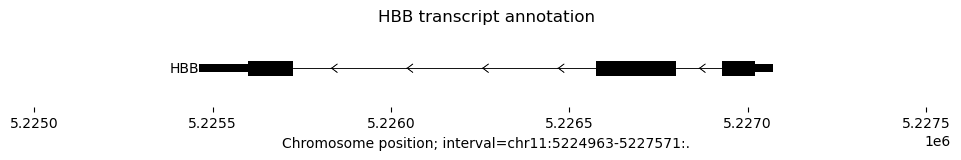

In [70]:
from alphagenome.visualization import plot_components as pc

gene_interval=gene_annotation.get_gene_interval(gtf, gene_symbol=GENE_NAME)
longest_transcripts = longest_transcript_extractor.extract(gene_interval)
interval_annotation=[pc.IntervalAnnotation(
    [
        genome.Interval(chrom, start, start+1, name='start'),
        genome.Interval(chrom, end, end+1, name='end')
    ],
    colors='red',
)]
plot=pc.plot(
    [
        pc.TranscriptAnnotation(longest_transcripts),
    ],
    interval=vis_interval,
    annotations=interval_annotation,
    title=f"{GENE_NAME} transcript annotation",
    fig_width=12
)